## This notebook does the following:

 <li>uses labeled buffers (y) </li>
 <li>Trains a ML Random Forest classifier</li>
 <li>Classifies on segments</li>


Labeled data (buffers)

In [8]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, roc_auc_score,plot_roc_curve, recall_score, precision_score, f1_score,auc
import matplotlib.pyplot as plt

In [10]:
plt.style.use("ggplot")

In [4]:
#importing training data for the 3 areas
#area 1
area_1_train = r".\training_preds\training_buff_area_1.shp"
area_1_train = gpd.read_file(area_1_train)
#area2
area_2_train = r".\training_preds\training_buff_area_2.shp"
area_2_train = gpd.read_file(area_2_train)
#area3
area_3_train = r".\training_preds\training_buff_area_3.shp"
area_3_train = gpd.read_file(area_3_train)

#checking if the labels are balanced:
print("area 1 training data labels:")
print(area_1_train['y'].value_counts())
print("area 2 training data labels:")
print(area_2_train['y'].value_counts())
print("area 3 training data labels:")
print(area_3_train['y'].value_counts())

area 1 training data labels:
1    204
0    196
Name: y, dtype: int64
area 2 training data labels:
0    199
1    194
Name: y, dtype: int64
area 3 training data labels:
0    226
1    224
Name: y, dtype: int64


In [6]:

#creating a new column "sun": 1= in the sun, 0 = not in the sun
#column y: 1= road, 0 = no road
# Filled visually in QGIS.

area_1_train["sun"] = None
area_2_train["sun"] = None
area_3_train["sun"] = None

# Export to .shp to relabel in QGIS
area_1_train.to_file(r".\training_preds\training_buff_area_1_sun.shp")
area_2_train.to_file(r".\training_preds\training_buff_area_2_sun.shp")
area_3_train.to_file(r".\training_preds\training_buff_area_3_sun.shp")

## All the work done in QGIS by us corresponds to labelling ground truth, necessary to build the training algorithm . <br> The field "y" indicates if the row is road (1) or not (0)

In [11]:
training_dataset = glob.glob(os.path.join(r".\training_preds","*shp"))

In [12]:
training_dataset

['.\\training_preds\\to_predict_segments_area_1.shp',
 '.\\training_preds\\to_predict_segments_area_2.shp',
 '.\\training_preds\\to_predict_segments_area_3.shp',
 '.\\training_preds\\training_buff_area_1.shp',
 '.\\training_preds\\training_buff_area_1_sun.shp',
 '.\\training_preds\\training_buff_area_2.shp',
 '.\\training_preds\\training_buff_area_2_sun.shp',
 '.\\training_preds\\training_buff_area_3.shp',
 '.\\training_preds\\training_buff_area_3_sun.shp']

AREA_1
.\training_preds\training_buff_area_1.shp
Index(['mea_blue', 'med_blue', 'p95_blue', 'mea_green', 'med_green',
       'p95_green', 'mea_red', 'med_red', 'p95_red', 'mea_nir', 'med_nir',
       'p95_nir', 'dsm_mean', 'dsm_med', 'dsm_p95'],
      dtype='object')
Model accuracy: 0.858
best params   {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 80}
Confusion matrix balanced:
[[52  7]
 [10 51]]


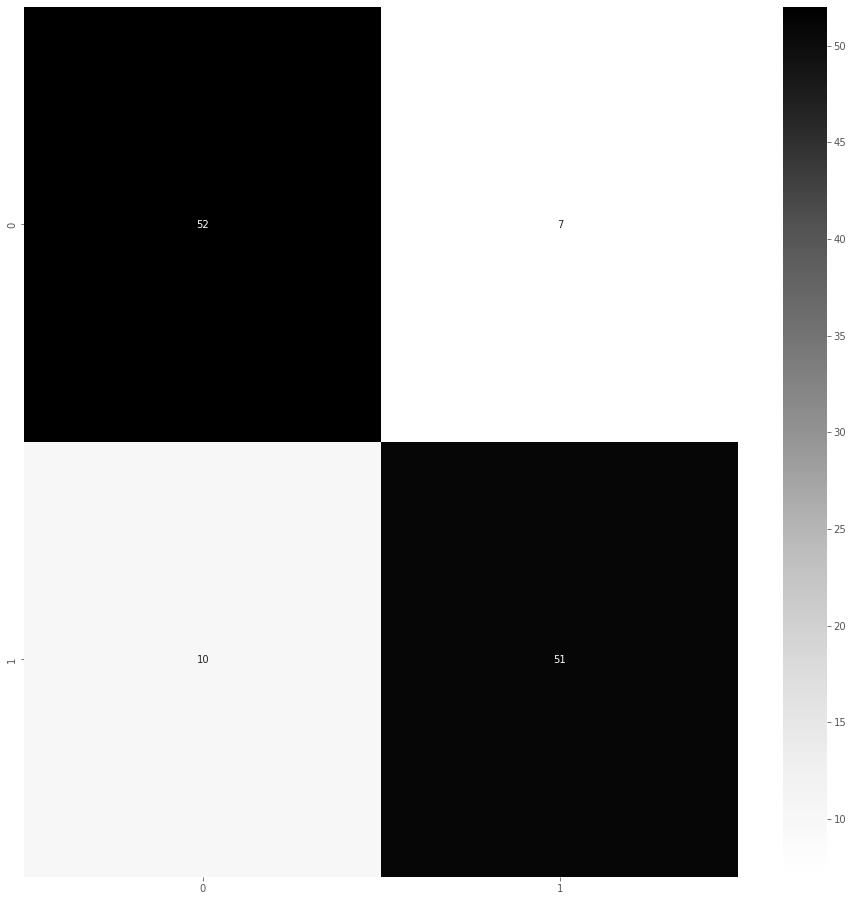

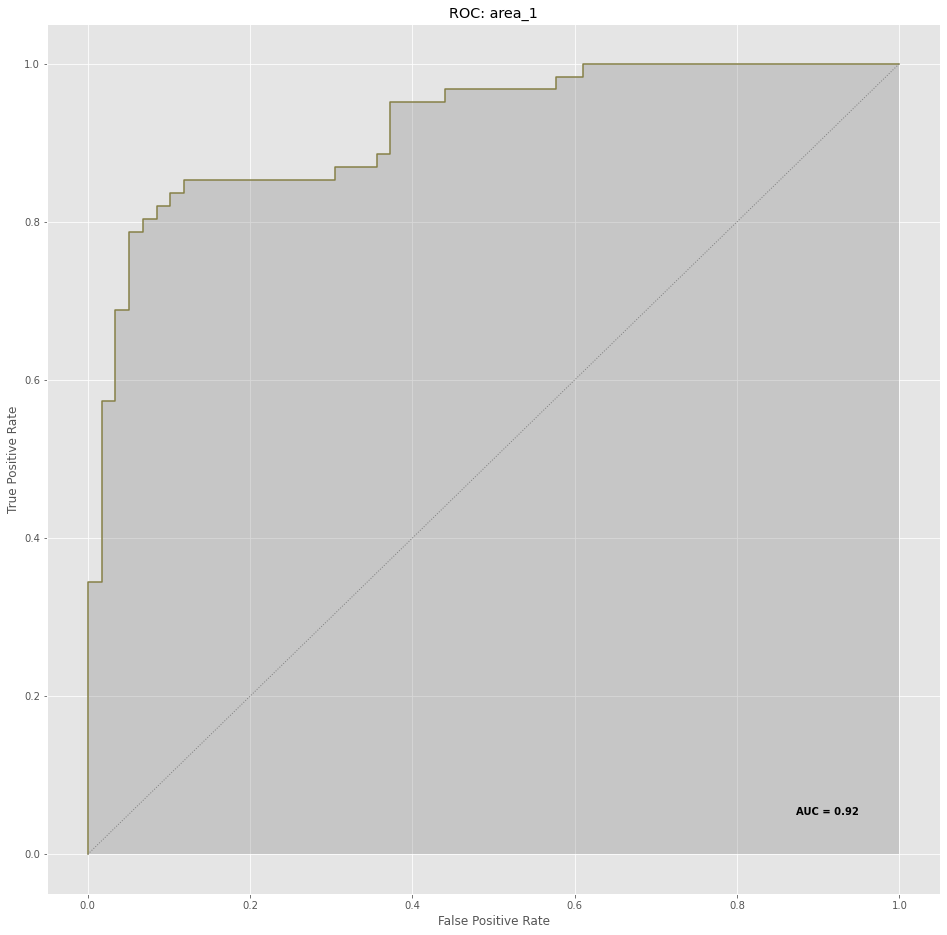

Recall: 0.836
Precision: 0.879
F1 Score: 0.857
Index(['mea_blue', 'med_blue', 'p95_blue', 'mea_green', 'med_green',
       'p95_green', 'mea_red', 'med_red', 'p95_red', 'mea_nir', 'med_nir',
       'p95_nir', 'dsm_mean', 'dsm_med', 'dsm_p95'],
      dtype='object')


I:\_PhD_\_y_2021_n_2022\Studies\_Data_\Process_Data\gaussian_filters\gausconda\lib\site-packages\geopandas\geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


AREA_2
.\training_preds\training_buff_area_2.shp
Index(['mea_blue', 'med_blue', 'p95_blue', 'mea_green', 'med_green',
       'p95_green', 'mea_red', 'med_red', 'p95_red', 'mea_nir', 'med_nir',
       'p95_nir', 'dsm_mean', 'dsm_med', 'dsm_p95'],
      dtype='object')
Model accuracy: 0.932
best params   {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 90}
Confusion matrix balanced:
[[57  1]
 [ 7 53]]


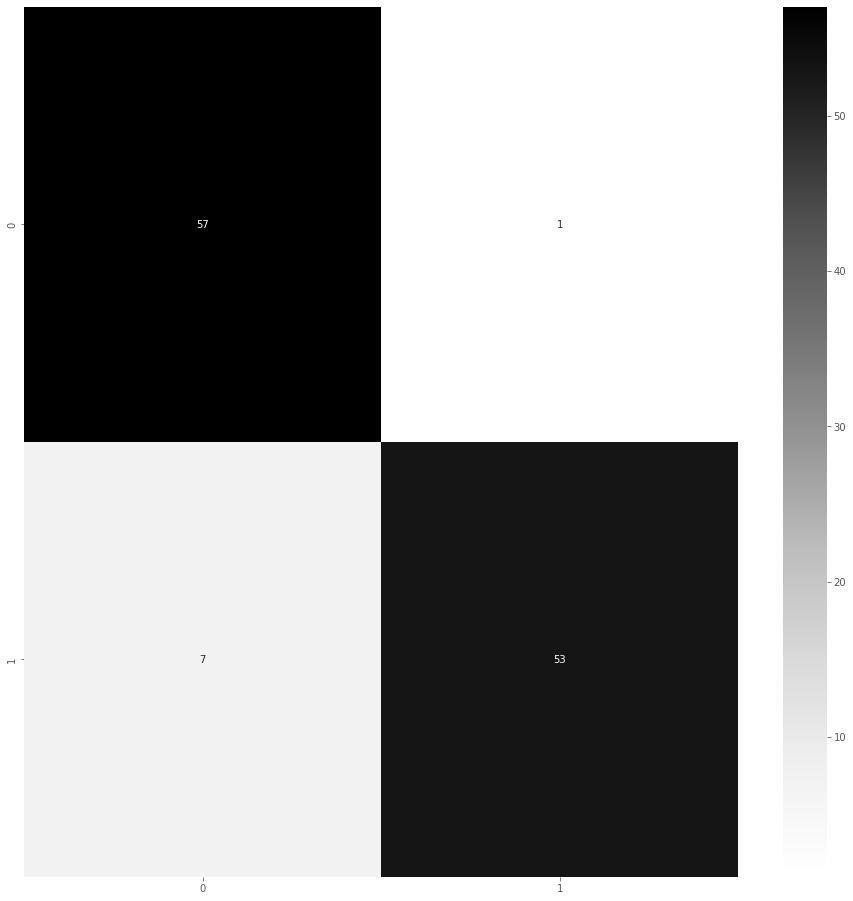

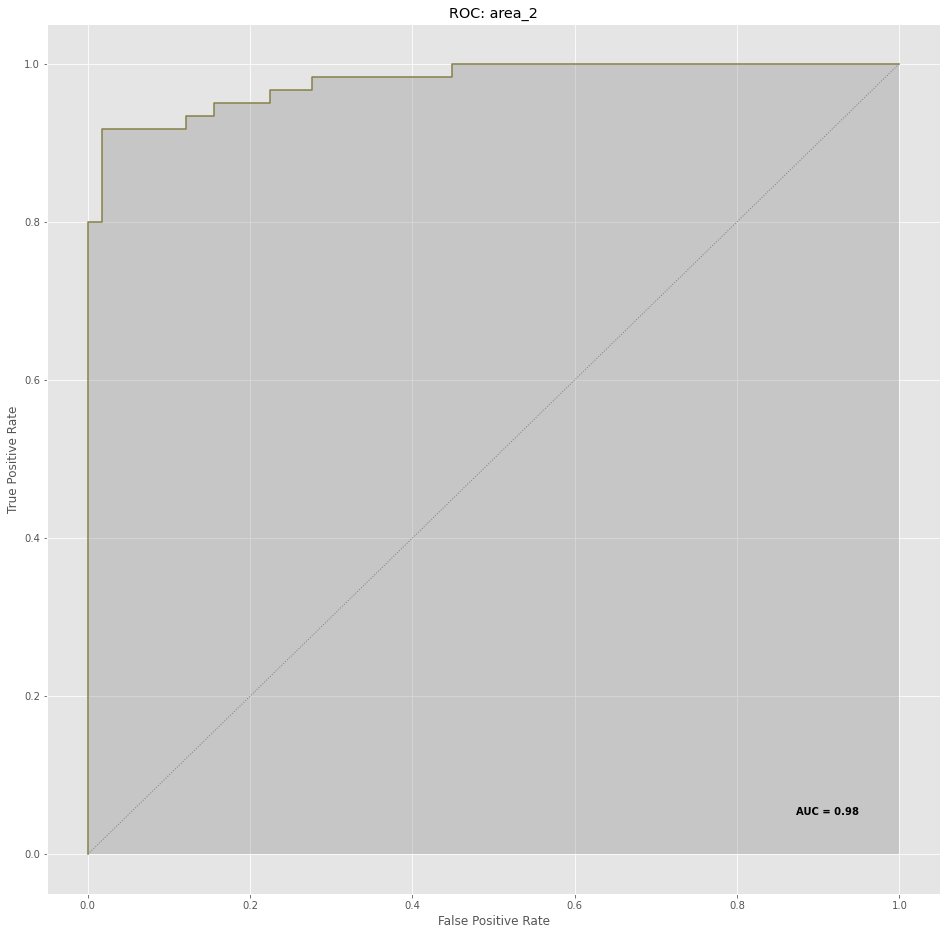

Recall: 0.883
Precision: 0.981
F1 Score: 0.930
Index(['mea_blue', 'med_blue', 'p95_blue', 'mea_green', 'med_green',
       'p95_green', 'mea_red', 'med_red', 'p95_red', 'mea_nir', 'med_nir',
       'p95_nir', 'dsm_mean', 'dsm_med', 'dsm_p95'],
      dtype='object')


I:\_PhD_\_y_2021_n_2022\Studies\_Data_\Process_Data\gaussian_filters\gausconda\lib\site-packages\geopandas\geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


AREA_3
.\training_preds\training_buff_area_3.shp
Model accuracy: 0.956
best params   {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 90}
Confusion matrix balanced:
[[68  4]
 [ 2 61]]


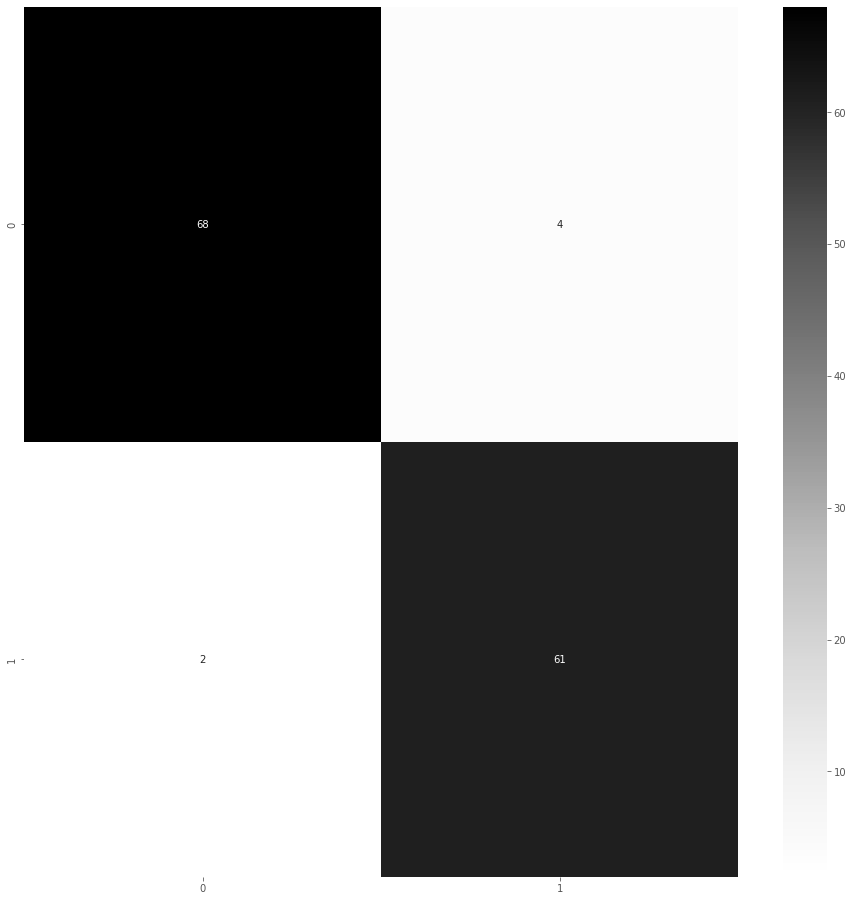

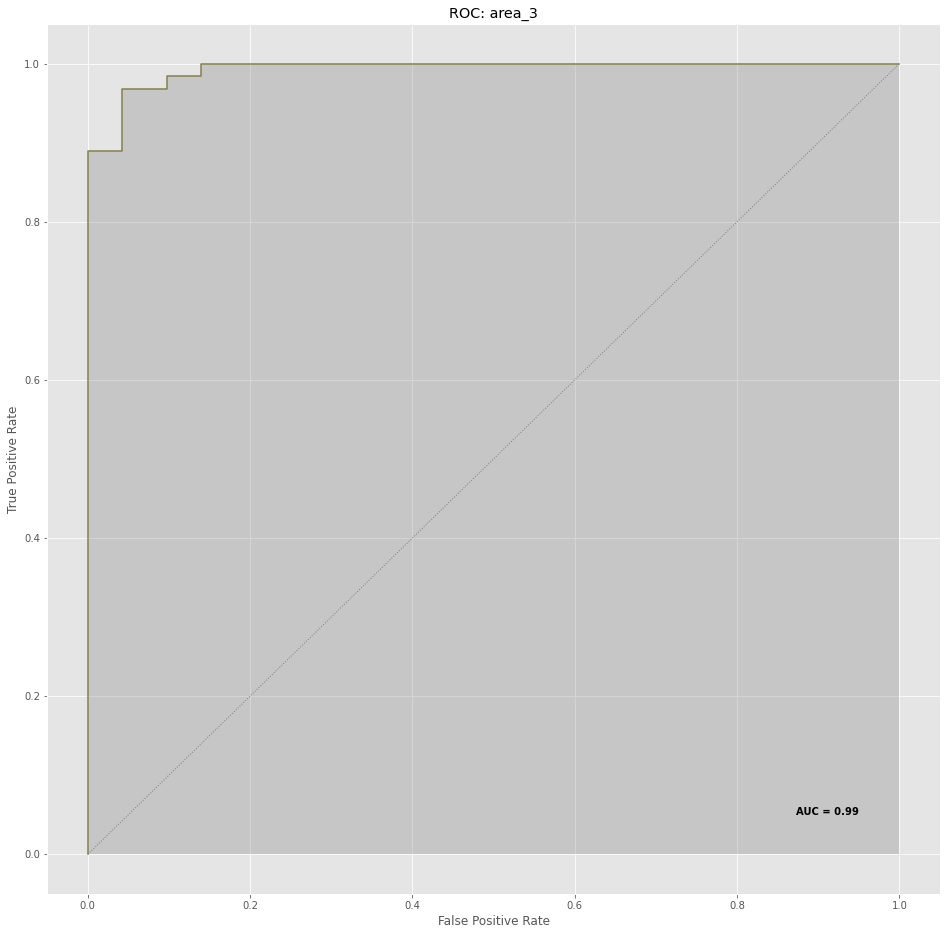

Recall: 0.968
Precision: 0.938
F1 Score: 0.953


I:\_PhD_\_y_2021_n_2022\Studies\_Data_\Process_Data\gaussian_filters\gausconda\lib\site-packages\geopandas\geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Finished


In [16]:
parameters_rf = {"criterion": ["gini", "entropy"],
                "n_estimators": range(80,151,10),
                "max_depth": range(2,11,1),
                      "max_features":["sqrt"]}



areas = ["area_1","area_2","area_3"]

random_state = 0
test_perc = 0.3

plt.rcParams['figure.figsize'] = [16, 16]
                 
for area in areas: 
    
    print(area.upper())
    training = [train for train in training_dataset if ("buff" in train) and (area in train)][0]
    to_predict = [pred for pred in training_dataset if ("to_predict" in pred) and (area in pred)][0]
    print(training)
    gdf_train = gpd.read_file(training)
    gdf_predict = gpd.read_file(to_predict)
    
    
    if area == "area_3":
        
        X = gdf_train.drop(['id_b','id','geometry','y'], axis=1)
        y = gdf_train['y'].astype(int) ## imPORTANT !!
        
        X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=test_perc, random_state=random_state)
    
        model_rf = RandomForestClassifier(random_state = 0)
    
        clf = GridSearchCV(model_rf, parameters_rf)
        
        clf = clf.fit(X_train, y_train)
        
        
        
        prediction = clf.predict(X_test)
    
        acc = accuracy_score(y_test, prediction)
        print('Model accuracy: %.3f' % acc)

        print("best params  ",clf.best_params_) 
        
        cfm = confusion_matrix(y_test,prediction) 
        print("Confusion matrix balanced:\n%s" % cfm)
        
        ax = sns.heatmap(cfm, annot=True, cmap='Greys')
        plt.savefig(os.path.join(r".\results",area+"_ConfMatx.png"),dpi = 250)
        plt.show()
        
        # building ROC curve
        probs = clf.predict_proba(X_test)
        
        fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
        
        roc_auc = auc(fpr, tpr)
        
        
        plt.title('ROC: '+area)
        plt.plot(fpr, tpr, '#857F45') #label = 'AUC = %0.2f' % roc_auc
        
        plt.plot([0, 1], [0, 1],linestyle='dotted', lw=1, color='grey', label='Random guess') #,'r--'
        #plt.legend(loc = 'lower right')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        
        plt.fill_between(fpr, tpr, facecolor='grey', alpha=0.3)
        plt.text(0.95, 0.05, 'AUC = %0.2f' % roc_auc, ha='right', fontsize=10, weight='bold', color='black')
        
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.savefig(os.path.join(r".\results",area+"_ROC.png"),dpi = 250)
        plt.show()
        
        
      
        print('Recall: %.3f' % recall_score(y_test, prediction))
        print('Precision: %.3f' % precision_score(y_test, prediction))
        print('F1 Score: %.3f' % f1_score(y_test, prediction))
        
        
        
        X_predict = gdf_predict.drop(['ID_n',"area",'geometry'], axis=1)
        
        prediction_segments = clf.predict(X_predict)
    
        to_predict_cpy = gdf_predict[['ID_n',"sun",'geometry']]
        to_predict_cpy["cat_p"] = prediction_segments
    
        to_predict_cpy.to_file(os.path.join(r".\results", "predicted_segments_"+area+"_binary_updt.shp"),driver = "ESRI Shapefile")
    
        
        
        
        
    else:
        X = gdf_train.drop(['id_b','id','geometry','sun','y'], axis=1)
        print(X.columns)
        
        y = gdf_train['y'].astype(int) ## imPORTANT !!
        
        X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=test_perc, random_state=random_state)
    
        model_rf = RandomForestClassifier(random_state = 0)
    
        clf = GridSearchCV(model_rf, parameters_rf)
        
        clf = clf.fit(X_train, y_train)
        
        
            
        prediction = clf.predict(X_test)
    
        acc = accuracy_score(y_test, prediction)
        print('Model accuracy: %.3f' % acc)
        print("best params  ",clf.best_params_) 
        cfm = confusion_matrix(y_test,prediction) 
        print("Confusion matrix balanced:\n%s" % cfm)
        
        ax = sns.heatmap(cfm, annot=True, cmap='Greys')
        
        plt.savefig(os.path.join(r".\results",area+"_ConfMatx.png"),dpi = 250)
        plt.show()
        
        # building ROC curve
        probs = clf.predict_proba(X_test)
        
        fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
        
        roc_auc = auc(fpr, tpr)
        
        
        plt.title('ROC: '+area)
        plt.plot(fpr, tpr, '#857F45') #label = 'AUC = %0.2f' % roc_auc
        
        plt.plot([0, 1], [0, 1],linestyle='dotted', lw=1, color='grey', label='Random guess') #,'r--'
        #plt.legend(loc = 'lower right')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        
        plt.fill_between(fpr, tpr, facecolor='grey', alpha=0.3)
        plt.text(0.95, 0.05, 'AUC = %0.2f' % roc_auc, ha='right', fontsize=10, weight='bold', color='black')
        
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.savefig(os.path.join(r".\results",area+"_ROC.png"),dpi = 250)
        plt.show()

        print('Recall: %.3f' % recall_score(y_test, prediction))
        print('Precision: %.3f' % precision_score(y_test, prediction))
        print('F1 Score: %.3f' % f1_score(y_test, prediction))        

        
        X_predict = gdf_predict.drop(['ID_n',"area",'geometry'], axis=1)
        print(X_predict.columns)
        prediction_segments = clf.predict(X_predict)
    
        to_predict_cpy = gdf_predict[['ID_n','geometry']]
        to_predict_cpy["cat_p"] = prediction_segments
    
        to_predict_cpy.to_file(os.path.join(r".\results", "predicted_segments_"+area+"_binary_updt.shp"),driver = "ESRI Shapefile")
        
print("Finished")     